In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

2024-03-10 13:58:00.155299: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 13:58:00.155459: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 13:58:00.326575: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Mounted at /content/drive


In [14]:
train_dir='/kaggle/input/car-or-not-dataset/training-20240310T135345Z-001/training'

In [15]:
image_size = (224,224)
batch_size = 20

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.15
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 373 images belonging to 2 classes.


In [17]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 64 images belonging to 2 classes.


In [18]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
base_model = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
predictions = Dense(2, activation='softmax')(x)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
epochs = 20
h=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1710079285.995364     141 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710079286.018366     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6159 - loss: 1.3427

W0000 00:00:1710079332.447578     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


18/18 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.6212 - loss: 1.3400 - val_accuracy: 0.8500 - val_loss: 1.1534 - learning_rate: 1.0000e-05
Epoch 2/20
 1/18 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.8500 - loss: 1.1762

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 406ms/step - accuracy: 0.8500 - loss: 1.1762 - val_accuracy: 1.0000 - val_loss: 1.0654 - learning_rate: 1.0000e-05
Epoch 3/20


W0000 00:00:1710079340.321530     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 417ms/step - accuracy: 0.8792 - loss: 1.0228 - val_accuracy: 0.7167 - val_loss: 1.2863 - learning_rate: 1.0000e-05
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.9950 - val_accuracy: 0.5000 - val_loss: 1.4210 - learning_rate: 1.0000e-05
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 426ms/step - accuracy: 0.9250 - loss: 0.8901 - val_accuracy: 0.9167 - val_loss: 0.8894 - learning_rate: 1.0000e-05
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.7326 - val_accuracy: 0.7500 - val_loss: 0.9763 - learning_rate: 1.0000e-05
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 429ms/step - accuracy: 0.9661 - loss: 0.7786 - val_accuracy: 0.8833 - val_loss: 0.9885 - learning_rate: 1.0000e-05
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.7053 - val_accuracy: 1.0000 - val_loss: 0.6828 - learning_rate: 1.0000e-05
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 417ms/step - accuracy: 0.9801 - loss: 0.

In [20]:
from tensorflow.keras.preprocessing.image import load_img
image1 = load_img('/kaggle/input/car-or-not-dataset/validation-20240310T135345Z-001/validation/cars/0004.jpg', target_size=(224,224,3))

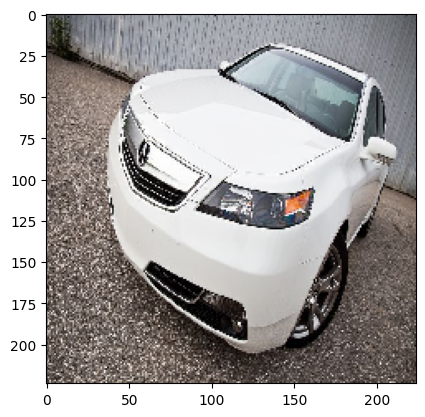

In [21]:
import matplotlib.pyplot as plt
plt.imshow(image1)


In [22]:
from tensorflow.keras.preprocessing.image import img_to_array
image1 = img_to_array(image1)
#image=image/255

In [23]:
from tensorflow.keras.applications.vgg16 import preprocess_input
image = preprocess_input(image1)

In [24]:
import numpy as np
image1=np.expand_dims(image1,axis=0)
pred = model.predict(image1)
pred_labels=np.argmax(pred,axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [25]:
pred

array([[1., 0.]], dtype=float32)

In [26]:
d={0:'Car',1:'Not_A_Car'}
for key in d.keys():
    if pred_labels[0]==key:
       print("validating whether damge or not...........Result:",d[key])
       print("Car or NOT: Detection complete.")

validating whether damge or not...........Result: Car
Car or NOT: Detection complete.


In [27]:
print(pred)

[[1. 0.]]


In [28]:
pred_labels

array([0])

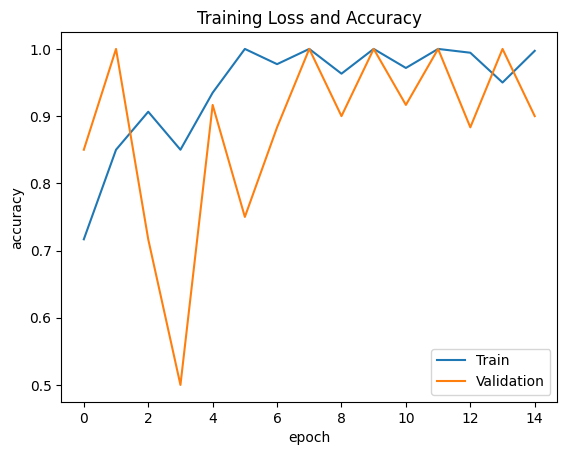

In [29]:
plt.plot(h.history['accuracy']) #get the accuracy for the training set from the model's history attribute
plt.plot(h.history['val_accuracy'])   #get the loss for the training set from the model's history attribute
plt.title('Training Loss and Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])

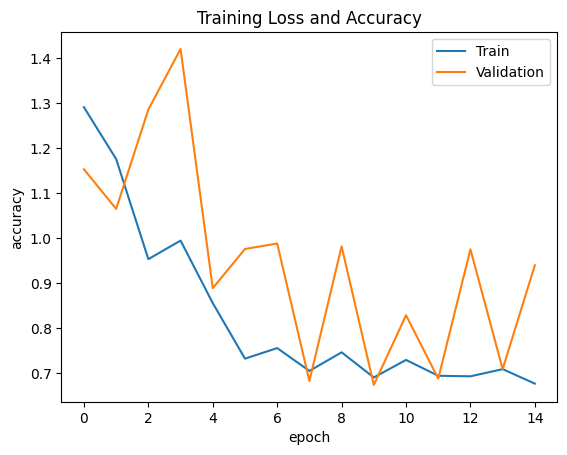

In [30]:
plt.plot(h.history['loss']) #get the accuracy for the training set from the model's history attribute
plt.plot(h.history['val_loss'])   #get the loss for the training set from the model's history attribute
plt.title('Training Loss and Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])

In [35]:
model.save('/kaggle/working/car_or_not_modified.h5')